In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [10]:
dataset_train=pd.read_csv('https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%208/LP5/DL/4/Google_Stock_Price_Train.csv')

In [11]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [12]:
training_set=dataset_train.iloc[:,1:2].values
training_set

array([[ 325.25    ],
       [ 331.27    ],
       [ 329.83    ],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [16]:
sc=MinMaxScaler()
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled.shape

(1509, 1)

In [18]:
x_train=[]
y_train=[]

for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train.shape

(1449, 60)

In [21]:
y_train.shape

(1449,)

In [24]:
x_train=np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))

C:\Users\rahul patil\AppData\Local\Temp\ipykernel_19556\3565591173.py:1: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  x_train=np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))


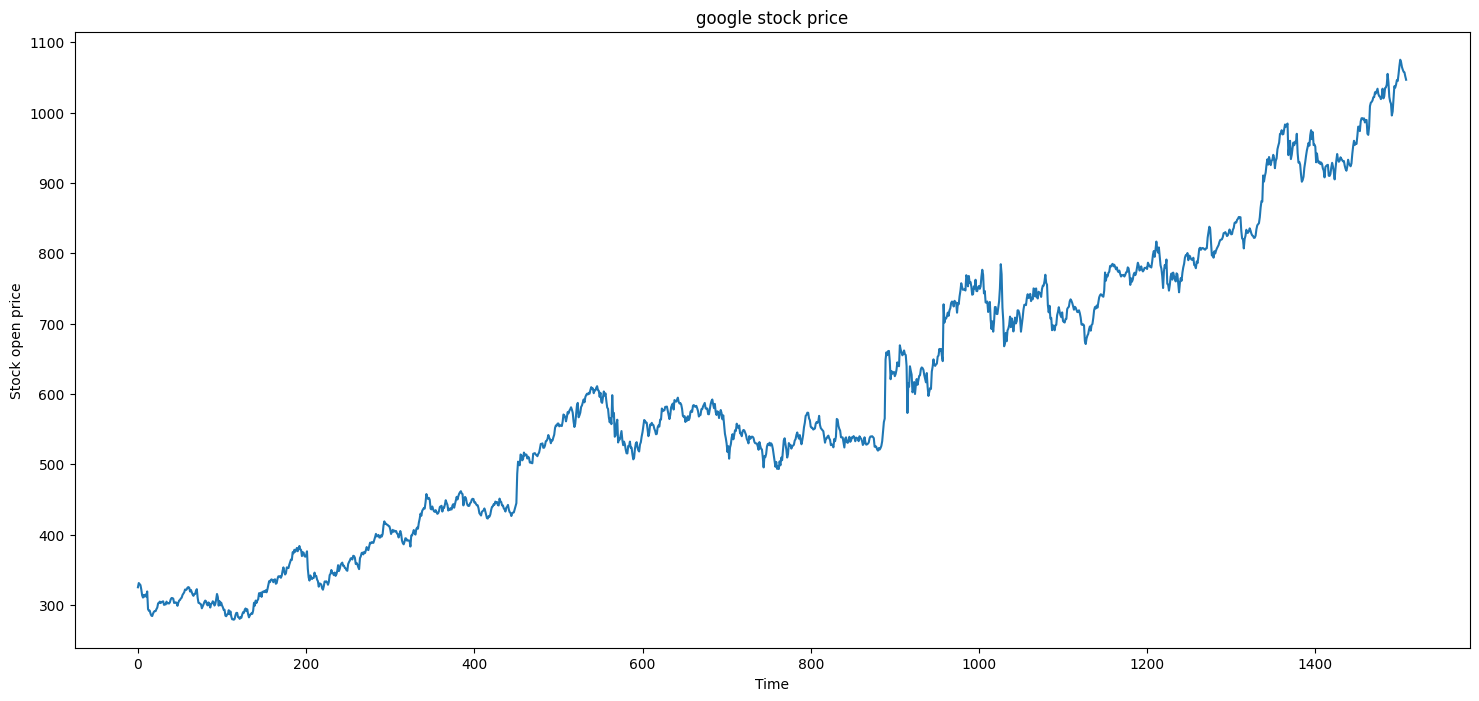

In [25]:
plt.figure(figsize=(18,8))
plt.plot(dataset_train['Open'])
plt.title("google stock price")
plt.xlabel("Time")
plt.ylabel("Stock open price")
plt.show()

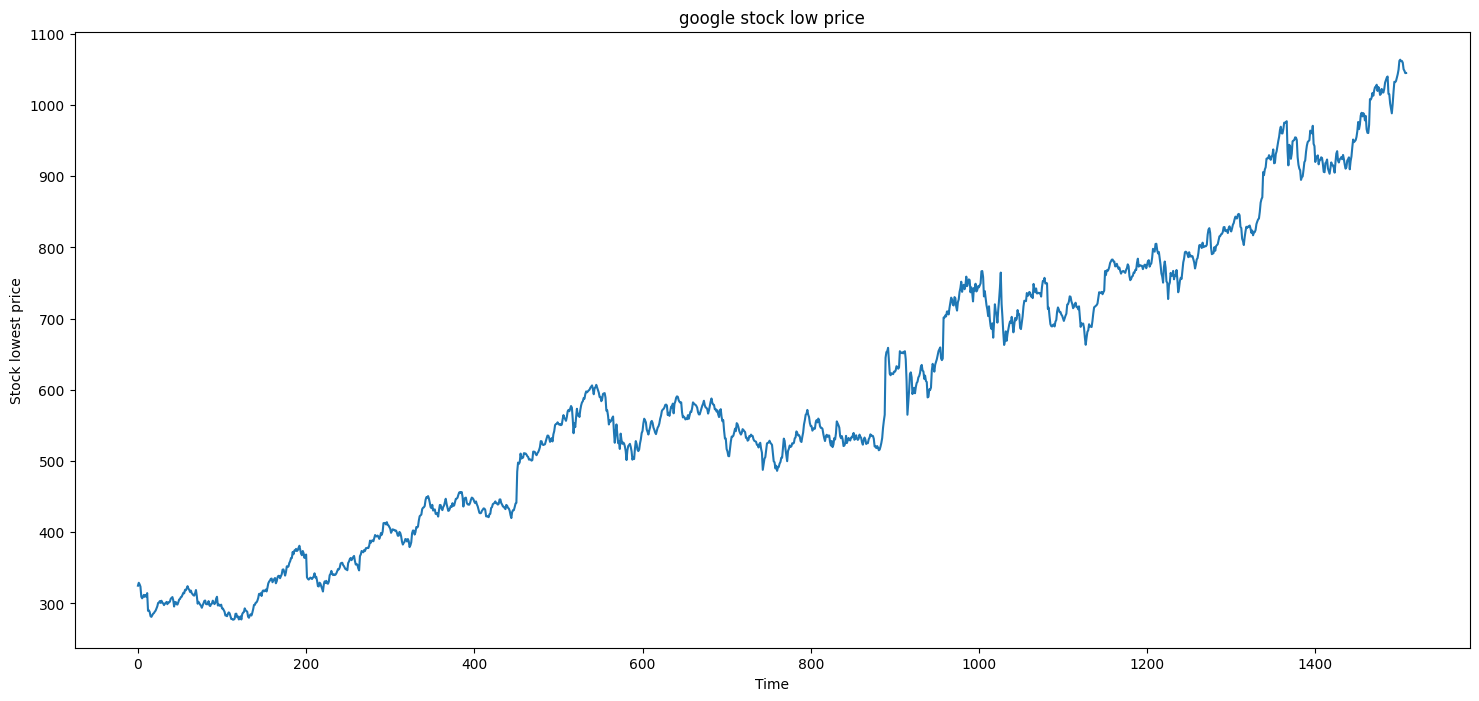

In [26]:
plt.figure(figsize=(18,8))
plt.plot(dataset_train['Low'])
plt.title("google stock low price")
plt.xlabel("Time")
plt.ylabel("Stock lowest price")
plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [99]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

C:\Users\rahul patil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [101]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - loss: 0.0535
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0041
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0040
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0030
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0032
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0026
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0033
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0028
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0028
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0030
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0027
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0029
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0026
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0024
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s

In [102]:
dataset_test=pd.read_csv('https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%208/LP5/DL/4/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [103]:
real_stock_prices=dataset_test.iloc[:,1:2].values
real_stock_prices.shape


(125, 1)

In [104]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

testing_set=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [105]:
testing_set.shape

(185,)

In [106]:
testing_set=testing_set.reshape(-1,1)

In [107]:
testing_set_scaled=sc.transform(testing_set)


In [108]:
testing_set_scaled.shape

(185, 1)

In [109]:
x_test=[]

for i in range (60,len(testing_set_scaled)):
    x_test.append(testing_set_scaled[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [110]:
x_test.shape

(125, 60, 1)

In [111]:
predict_stock_prices=model.predict(x_test)
predict_stock_prices.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step


(125, 1)

In [112]:
predict_stock_prices=sc.inverse_transform(predict_stock_prices)

In [113]:
predict_stock_prices

array([[1077.2129],
       [1075.5688],
       [1077.8615],
       [1086.7451],
       [1098.7172],
       [1110.0011],
       [1118.7327],
       [1121.5917],
       [1121.7689],
       [1120.7526],
       [1125.1908],
       [1131.9547],
       [1138.5243],
       [1143.1467],
       [1146.5714],
       [1153.0261],
       [1163.7778],
       [1173.4862],
       [1179.7097],
       [1182.7081],
       [1182.1705],
       [1180.7085],
       [1178.5507],
       [1169.6754],
       [1153.0729],
       [1125.8125],
       [1107.3048],
       [1098.2595],
       [1089.5804],
       [1085.6053],
       [1085.7031],
       [1088.1251],
       [1095.6797],
       [1106.2345],
       [1115.2891],
       [1122.9083],
       [1129.6039],
       [1133.5668],
       [1137.396 ],
       [1143.297 ],
       [1146.0839],
       [1142.8522],
       [1127.482 ],
       [1111.8651],
       [1106.9022],
       [1109.6462],
       [1119.3938],
       [1134.0217],
       [1152.1476],
       [1168.2701],


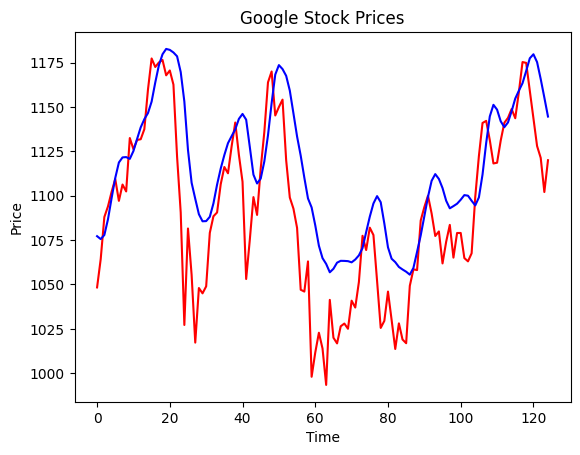

In [114]:
plt.plot(real_stock_prices,color='red',label='Real Prices')
plt.plot(predict_stock_prices,color='blue',label='Predicted Prices')
plt.title("Google Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()